In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score


# Prueba con modelo DBSCAN

In [43]:
df = pd.read_csv('../data_sample/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [45]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/w

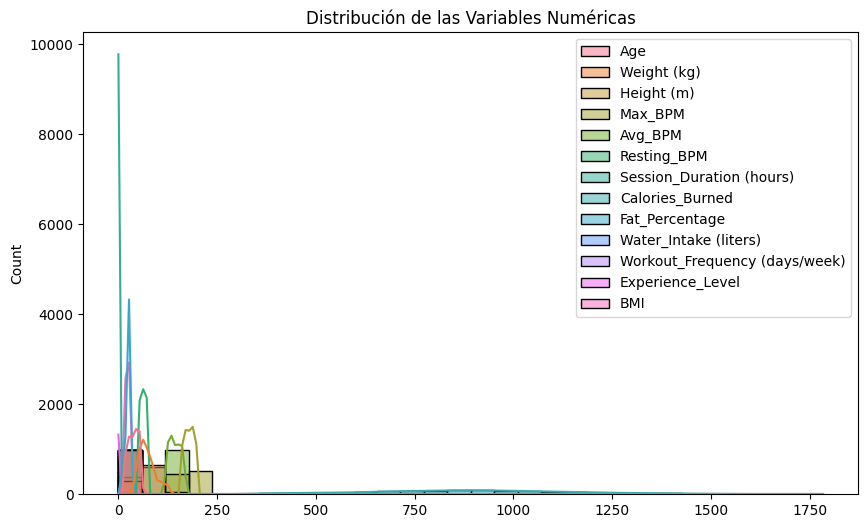

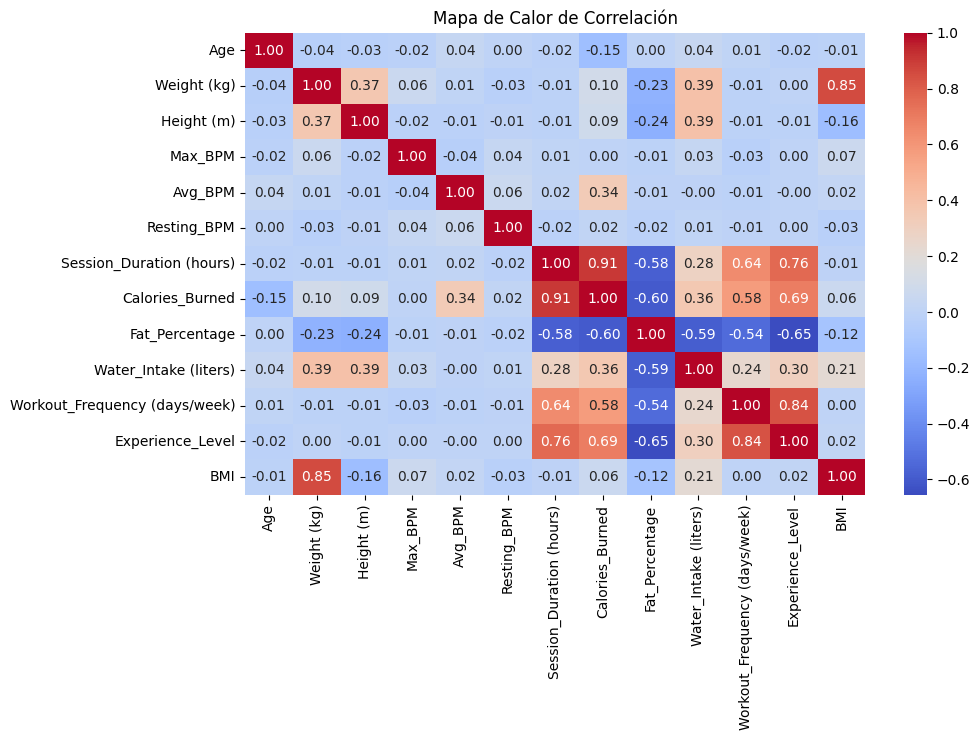

In [47]:
# Distribución de las variables numéricas
plt.figure(figsize=(10, 6))
sns.histplot(df.select_dtypes(include=[np.number]), bins=30, kde=True)
plt.title('Distribución de las Variables Numéricas')
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
# Manejo de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = encoder.fit_transform(df[categorical_cols])
    df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
    df = df.drop(columns=categorical_cols).reset_index(drop=True)
    df = pd.concat([df, df_encoded], axis=1)

In [ ]:
# Preprocesamiento de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
# Encontrar el mejor valor de eps
def find_optimal_eps(data, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(data)
    distances, _ = neighbors.kneighbors(data)
    distances = np.sort(distances[:, k-1])
    plt.plot(distances)
    plt.xlabel('Puntos de datos ordenados')
    plt.ylabel(f'Distancia al {k}-ésimo vecino')
    plt.title('Curva para encontrar el valor óptimo de eps')
    plt.show()

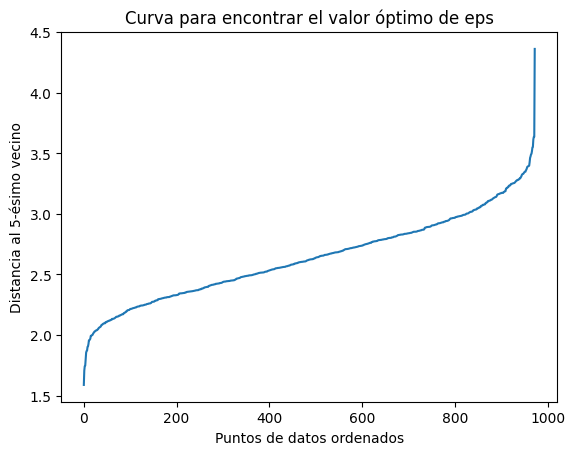

In [ ]:
find_optimal_eps(df_scaled)

In [ ]:
# Aplicar DBSCAN con búsqueda de mejores parámetros
def apply_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_eps = None
    best_min_samples = None
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(data)
            
            if len(set(labels)) > 1:
                score = silhouette_score(data, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels
    
    print(f'Mejor eps: {best_eps}, Mejor min_samples: {best_min_samples}, Mejor Silhouette Score: {best_score}')
    return best_eps, best_min_samples, best_labels

In [ ]:
# Rango de valores a probar
eps_range = np.arange(0.05, 1.0, 0.05)
min_samples_range = range(2, 20)

best_eps, best_min_samples, best_labels = apply_dbscan(df_pca, eps_range, min_samples_range)

df['Cluster'] = best_labels

Mejor eps: 0.55, Mejor min_samples: 2, Mejor Silhouette Score: 0.42350428805563334


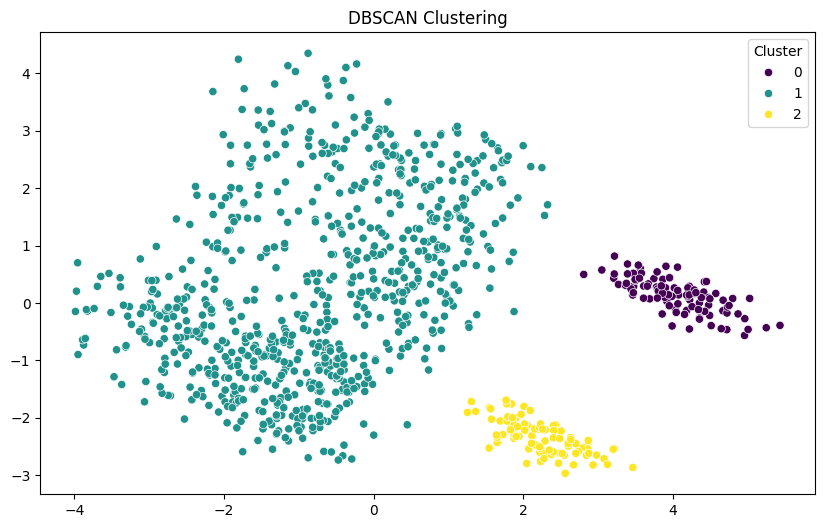

In [ ]:
# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
